# World Happiness Report Project

Name : Soham Vashi                                                                                                         
Batch no. : DS2402

# Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# What is Dystopia?


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

# What are the residuals?


The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe? 

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
#top 5 rows of data
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
#bottom 5 rows of data
df.tail(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df.shape

(158, 12)

There are 158 rows and 12 columns in dataset.

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Data set contains object,int64 and float 64 data types.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Here we can see it's memory usage is 14.9+ kb.

In [14]:
#checking for null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There is no null values are present in the dataset.

<Axes: >

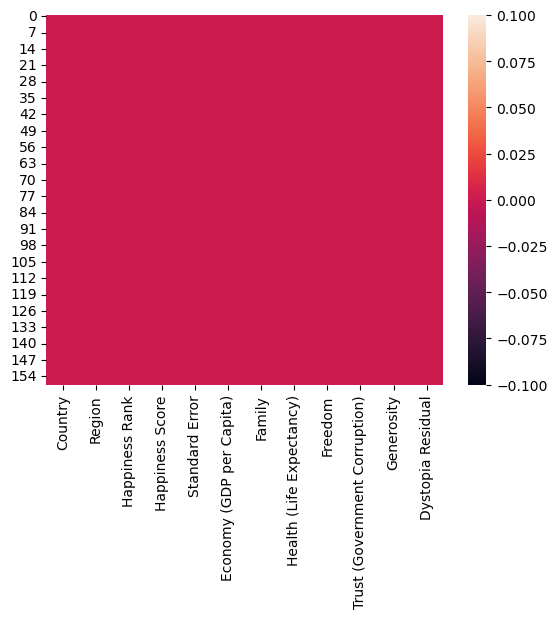

In [16]:
#visualize the null vales
sns.heatmap(df.isnull())

From graph also it is confirmed there is no null values are present in the data.

# Statistical Summary

In [18]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


It gives the information of mean,meadian.25th,50th,75th percentile,standard deviation of dataset                              
1)The gap between 75th percentile and max values indicates the presence of outliers.                                            
2)We can see that some countries have min values are 0.

In [19]:
df.loc[df['Economy (GDP per Capita)'] == 0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [20]:
#lets try to find countries at bottom in respective category.
df.loc[df['Family']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


In [21]:
df.loc[df['Health (Life Expectancy)'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [22]:
df.loc[df['Freedom']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [23]:
df.loc[df['Trust (Government Corruption)']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


Economy (GDP per Capita): Congo (Kinshasa) has the lowest performance in this category.

Family: Central African Republic exhibits the lowest performance regarding family support.

Health (Life Expectancy): Sierra Leone ranks lowest in terms of life expectancy.

Freedom: Iraq demonstrates the lowest level of freedom among the countries.

Trust (Government Corruption): Indonesia is characterized by the lowest trust in government integrity.


# Creating a new dataframe by selecting only numerical data types for further analysis.

In [3]:
df_new = df[df.columns[3:]]
df_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


We drop the country,region and happiness rank columns here.

In [4]:
x=df_new.drop(columns=['Happiness Score'])
y=df_new['Happiness Score']

# EDA(Exploratory data analysis) and Visualization.

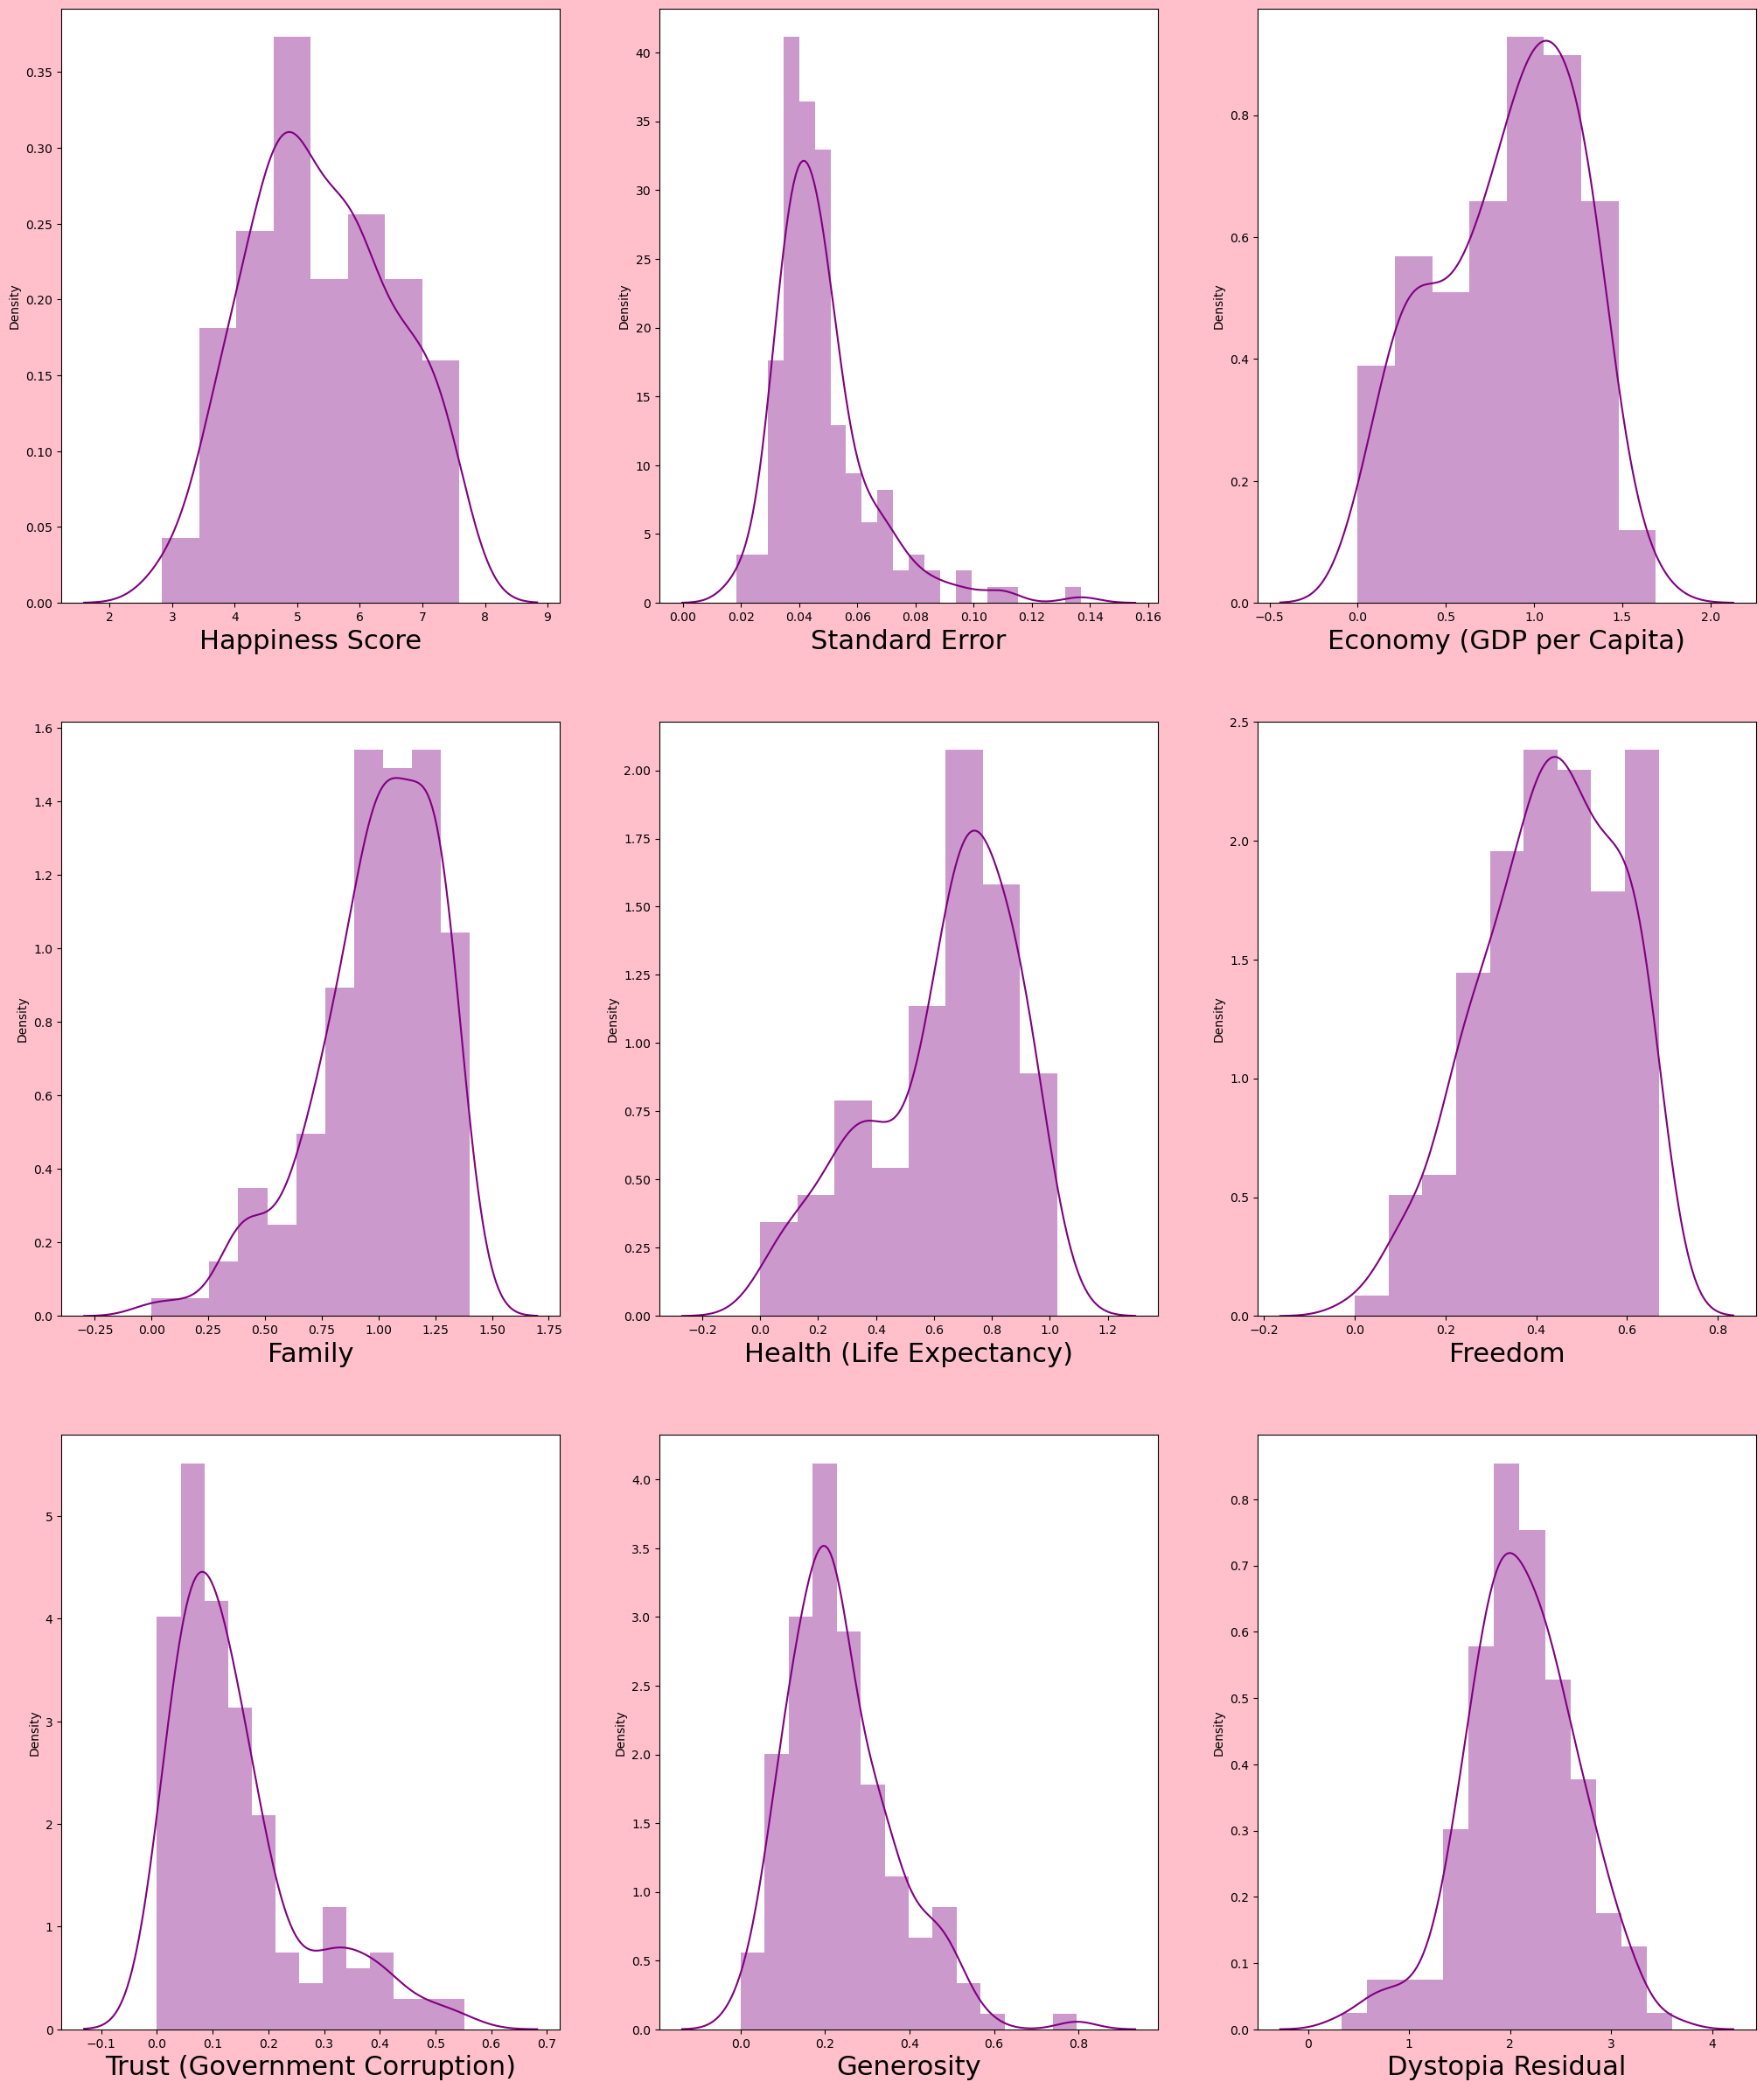

In [29]:
plt.figure(figsize=(25,30), facecolor='pink')
plotnumber=1
for column in df_new:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column], color='purple')
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.show()

In [30]:
#checking for skewness
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

From graph and skewness values we can observe that                                                                             
1)standard Error, Trust, Generosity has right skewed distribution.                                                               
2)Family variable has left skewed distribution.                                                                                
3)And remainng are normally distributed                                                                                          

In [5]:
#Handling the skewness 
from scipy.stats import boxcox

Log transform = 0 square root trasform = 0.5

In [6]:
df['Standard Error']=boxcox(df['Standard Error'],0)


A log transformation in a left-skewed distribution will tend to make it even more left skew. Family variable has left skewed distribution.

In [7]:
# checking skewness after applying boxcox
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Variance_inflation_factor(VIF)

checking for Multicollinearity

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
vif=pd.DataFrame()

In [10]:
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
print(vif)

         vif                       features
0   7.166167                 Standard Error
1  21.759914       Economy (GDP per Capita)
2  25.636995                         Family
3  23.090959       Health (Life Expectancy)
4  15.880880                        Freedom
5   3.497600  Trust (Government Corruption)
6   5.600094                     Generosity
7  12.574726              Dystopia Residual


1)Trust (Government Corruption),Generosity has low multicollinearity.                                                           
2)Economy (GDP per Capita), Family, Health (Life Expectancy), and Dystopia Residual have VIFs indicating high multicollinearity, with values ranging from 21.76 to 25.64.

# Correlation 

In [11]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.190675,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.210296,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.190675,-0.210296,1.000000,-0.223477,-0.133812,-0.320471,-0.171718,-0.187226,-0.124805,0.052531
Economy (GDP per Capita),-0.785267,0.780966,-0.223477,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.133812,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.320471,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.171718,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.187226,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.124805,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.052531,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

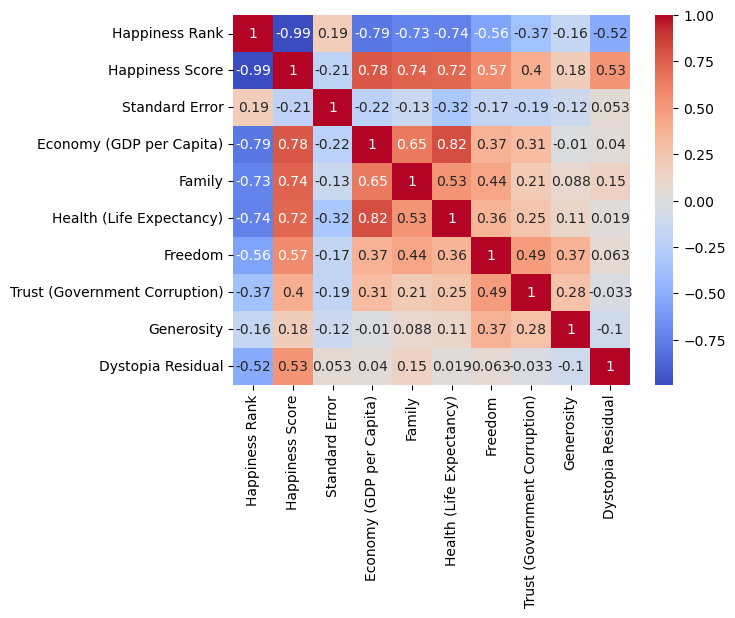

In [12]:
#visualizing by heatmap
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Top 10  happiest countries based on happiness rank.

In [13]:
top_10=df.sort_values(by='Happiness Score', ascending=False).head(10)
top_10

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,-3.460947,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,-3.575908,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,-3.455548,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,-3.389961,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,-3.198338,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


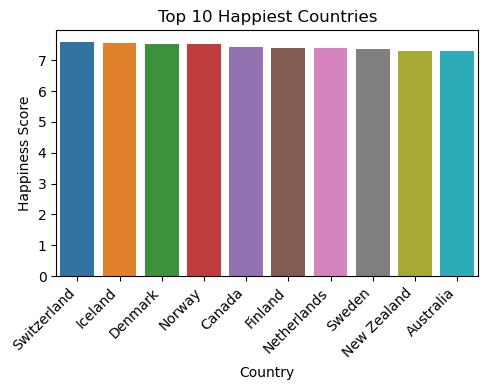

In [14]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Country', y='Happiness Score', data=top_10)
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()



Switzerland of Western Europe region is the top one country with happiness score 7.587

# Bottom 10 happiest countries based on happiness rank

In [15]:
bottom_10=df.sort_values(by='Happiness Score', ascending=True).head(10)
bottom_10

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,-2.699041,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,-2.446686,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,-2.992737,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,-3.327018,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,-3.262305,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


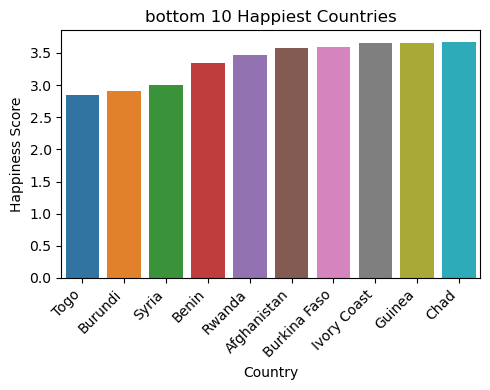

In [16]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Country', y='Happiness Score', data=bottom_10)
plt.title('bottom 10 Happiest Countries')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

Chad of Sub-Saharan Africa region has least happiness rank with happiness score 3.667.

So by given data we can conclude that "Australia and New Zealand" is Happiest Region in world followed by 'North America' while 'Sub-Saharan Africa' has least Happiest Region in world.

# Boxplot

Happiness Score                     Axes(0.125,0.653529;0.227941x0.226471)
Standard Error                   Axes(0.398529,0.653529;0.227941x0.226471)
Economy (GDP per Capita)         Axes(0.672059,0.653529;0.227941x0.226471)
Family                              Axes(0.125,0.381765;0.227941x0.226471)
Health (Life Expectancy)         Axes(0.398529,0.381765;0.227941x0.226471)
Freedom                          Axes(0.672059,0.381765;0.227941x0.226471)
Trust (Government Corruption)           Axes(0.125,0.11;0.227941x0.226471)
Generosity                           Axes(0.398529,0.11;0.227941x0.226471)
Dystopia Residual                    Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

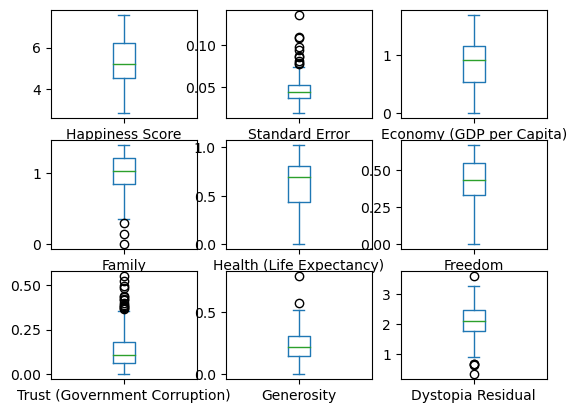

In [17]:
df_new.plot(kind ='box', subplots = True, layout=(3,3))


# Model Building

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)

In [20]:
print(x_train.shape,y_train.shape)

(105, 8) (105,)


In [21]:
print(x_test.shape,y_test.shape)

(53, 8) (53,)


# Finding best random state

In [22]:
maxR2_score=0
maxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxR2_score:
        maxR2_score=r2
        maxRs=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRs)        

Best accuracy is 0.9999999543480629 on Random_state 33


# Linear Regression

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=33)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred=lr.predict(x_test)
print('Predicted result :', y_pred)
print('\n')
print('Actual result :',y_test)

Predicted result : [3.78084398 5.12312992 5.00702664 4.7147833  5.10160715 5.58866641
 3.34000793 4.21844416 5.07326316 4.03311181 4.97123627 3.46482361
 2.83890823 5.47370895 6.94023077 6.61124101 3.58689153 7.28601691
 4.56467985 6.57406524 4.87598959 5.71587821 4.89766499 4.33216523
 6.78624599 4.25203871 4.51789809 7.28399234 6.93733557 3.66728446
 3.00623749 7.19982287 4.55063634 4.64236532 4.68075326 3.84500193
 4.29659294 6.81024863 6.29477104 4.29252066 5.84762119 4.63348827
 3.65510301 4.78791055 6.41117662 5.47701882 5.69524696 3.65594964
 4.79955853 4.68556413 7.52702468 7.37812867 4.41932858]


Actual result : 145    3.781
86     5.123
92     5.007
107    4.715
87     5.102
68     5.589
154    3.340
133    4.218
89     5.073
136    4.033
93     4.971
153    3.465
157    2.839
71     5.474
17     6.940
27     6.611
151    3.587
8      7.286
116    4.565
29     6.574
98     4.876
63     5.716
96     4.898
127    4.332
24     6.786
132    4.252
118    4.518
9      7.284
18    

# LinearRegression Evaluation Matrix

In [29]:
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score :",r2_score(y_test,y_pred))

Mean absolute error : 0.00021678069686631755
Mean squared error : 6.996088855418856e-08
Root Mean Squared Error: 0.00026450120709401034
R2_score : 0.9999999543480629


# Different Regressor Model

In [30]:
rf = RandomForestRegressor(n_estimators = 150 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

In [32]:
model=[rf,svr,dtc,ad]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Error of ",m,":")
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print("R2_score :",r2_score(y_test,y_pred))
    print('\n')

Error of  RandomForestRegressor(n_estimators=150) :
Mean absolute error : 0.3154514465408809
Mean squared error : 0.17201408181383654
Root Mean Squared Error: 0.41474580385319937
R2_score : 0.8877547697740031


Error of  SVR() :
Mean absolute error : 0.10565578052542997
Mean squared error : 0.034201448164947613
Root Mean Squared Error: 0.18493633543721907
R2_score : 0.9776823537767578


Error of  DecisionTreeRegressor() :
Mean absolute error : 0.4677358490566037
Mean squared error : 0.3423884905660377
Root Mean Squared Error: 0.5851397188416094
R2_score : 0.7765794838127893


Error of  AdaBoostRegressor() :
Mean absolute error : 0.3778825771369123
Mean squared error : 0.21917859491436179
Root Mean Squared Error: 0.4681651363721585
R2_score : 0.8569782683641072




# Here LinearRegression model gives maximum R2_score that is 0.99

 such perfect performance is unusual and might be overfitting or data leakage. Therefore, we should investigate further to ensure that the model is correctly implemented and evaluate it on unseen data.

# Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
score=cross_val_score(lr,x,y,cv=5)
print("Score :",score)
print('Mean score :',score.mean())
print('Standard deviation :',score.std())

Score : [0.99999945 0.99999834 0.99999836 0.99999535 0.99999943]
Mean score : 0.9999981871007761
Standard deviation : 1.4991023001111373e-06


The mean score being very close to 1 indicates that the model predicts the target variable almost perfectly on average across different folds of the data. The standard deviation being extremely small suggests that the performance of the model is consistent across folds.

# Saving Model

In [35]:
import joblib
joblib.dump(lr,'lrfile.obj')

['lrfile.obj']

# Final prediction

In [36]:
prediction = lr.predict(x_test)
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,3.780844,3.781
1,5.123130,5.123
2,5.007027,5.007
3,4.714783,4.715
4,5.101607,5.102


# ----------------------------------------THANK YOU--------------------------------------------